### Restaurant Order Analysis

Analyze order data to identify the most and least popular menu items and types of cuisine

#### Problem Statement:

You've just been hired as a Data Analyst for the Taste of the World Cafe, a restaurant that has diverse menu offerings and serves generous portions. The Taste of the World Cafe debuted a new menu at the start of the year. You've been asked to dig into the customer data to see which menu items are doing well / not well and what the top customers seem to like the most.

#### Objectives: 
<b>Objective 1: </b>Explore the items table

Your first objective is to better understand the items table by finding the number of rows in the table, the least and most expensive items, and the item prices within each category.

<b>Objective 2: </b>Explore the orders table

Your second objective is to better understand the orders table by finding the date range, the number of items within each order, and the orders with the highest number of items.

<b>Objective 3: </b>Analyze customer behavior

Your final objective is to combine the items and orders tables, find the least and most ordered categories, and dive into the details of the highest spend orders.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mysql.connector
from datetime import datetime

In [11]:
# conn = mysql.connector.connect(
#     host="localhost",
#     user="root",
#     password="password",
#     database="restaurant_db"
# )

# query1 = "SELECT * FROM menu_items"
# query2 = "SELECT * FROM order_details"
# menu_items = pd.read_sql(query1, conn)
# order_details = pd.read_sql(query2, conn)

# conn.close()

In [12]:
# menu_items.to_csv("menu_items.csv", index=False)
# order_details.to_csv("order_details.csv", index=False)

In [13]:
# read the csv datasets
menu_items = pd.read_csv("menu_items.csv")
order_details = pd.read_csv("order_details.csv")

In [14]:
print(menu_items.shape)
print(order_details.shape)

(32, 4)
(12234, 5)


In [15]:
menu_items.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [16]:
menu_items.dtypes

menu_item_id      int64
item_name        object
category         object
price           float64
dtype: object

In [17]:
order_details.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,2023-01-01,0 days 11:38:36,109.0
1,2,2,2023-01-01,0 days 11:57:40,108.0
2,3,2,2023-01-01,0 days 11:57:40,124.0
3,4,2,2023-01-01,0 days 11:57:40,117.0
4,5,2,2023-01-01,0 days 11:57:40,129.0


In [18]:
order_details.dtypes

order_details_id      int64
order_id              int64
order_date           object
order_time           object
item_id             float64
dtype: object

In [19]:
order_details['item_id'] = order_details['item_id'].convert_dtypes('int')
order_details['order_date'] = pd.to_datetime(order_details['order_date'])
order_details['order_time'] = order_details['order_time'].str.split().str[-1]
order_details['order_time'] = order_details['order_time'].apply(lambda x: datetime.strptime(x, "%H:%M:%S").time())
order_details["hour"] = order_details['order_time'].apply(lambda x: x.hour)

In [20]:
order_details.head()

,order_details_id,order_id,order_date,order_time,item_id,hour
0,1,1,2023-01-01,11:38:36,109,11
1,2,2,2023-01-01,11:57:40,108,11
2,3,2,2023-01-01,11:57:40,124,11
3,4,2,2023-01-01,11:57:40,117,11
4,5,2,2023-01-01,11:57:40,129,11


In [21]:
# Let's explore the menu_items table
menu_items.describe().T

,count,mean,std,min,25%,50%,75%,max
menu_item_id,32.0,116.500000,9.380832,101.0,108.75,116.50,124.25,132.00
price,32.0,13.285937,3.858071,5.0,10.50,13.95,15.75,19.95


In [22]:
menu_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [23]:
menu_items.duplicated().sum()

0

In [34]:
# Total unique items on the menu
menu_items['item_name'].nunique()

32

In [44]:
# most expensive item on the menu
menu_items[menu_items['price']==menu_items['price'].max()][['item_name', 'category', 'price']]

,item_name,category,price
29,Shrimp Scampi,Italian,19.95


In [45]:
# least expensive item on the menu
menu_items[menu_items['price']==menu_items['price'].min()][['item_name', 'category', 'price']]

,item_name,category,price
12,Edamame,Asian,5.0


In [29]:
# category distribution
menu_items['category'].value_counts()

Mexican     9
Italian     9
Asian       8
American    6
Name: category, dtype: int64

In [72]:
# category-wise average prices
cat_price = menu_items.groupby(['category'])['price'].mean().round(2).sort_values(ascending=False).reset_index()
cat_price

,category,price
0,Italian,16.75
1,Asian,13.48
2,Mexican,11.80
3,American,10.07


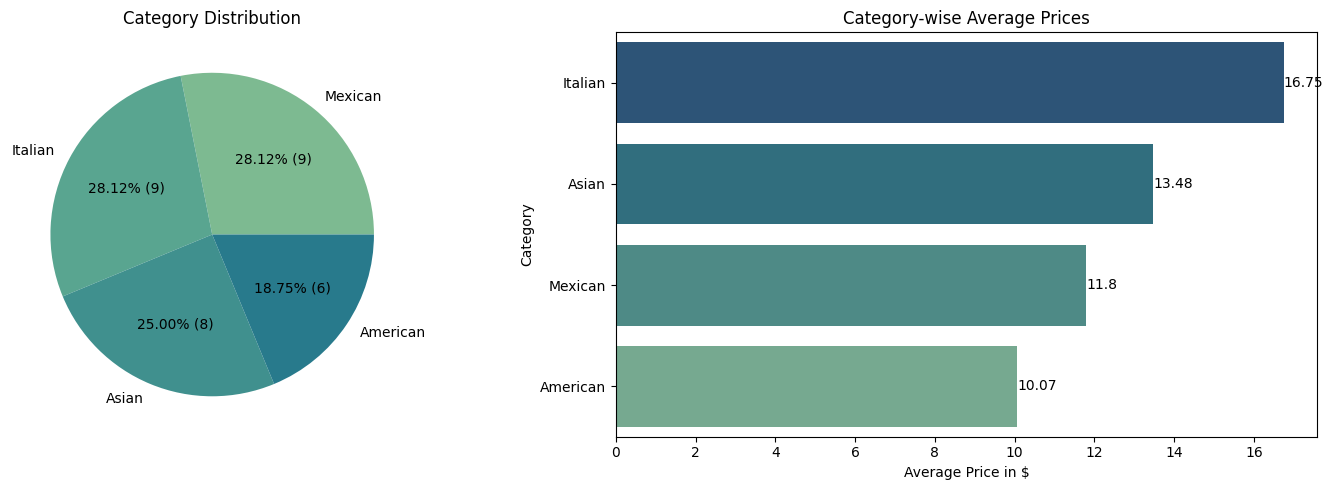

In [74]:
plt.figure(figsize=(15,5))

# category distribution
ax1 = plt.subplot2grid((1,2),(0,0))

datacategory = menu_items['category'].value_counts().values
labelscategory = menu_items['category'].value_counts().index
colors = sns.color_palette(palette='crest')

plt.pie(x=datacategory, labels=labelscategory,
        autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(datacategory)/100), colors=colors)
# plt.legend(labelscategory, loc='upper right', title='Attrition')
plt.title("Category Distribution")

# category-wise average prices
ax2 = plt.subplot2grid((1,2),(0,1))

sns.barplot(data=cat_price, x='price', y='category', estimator=np.mean, ci=None, palette='crest_r', dodge=False, ax=ax2)
for i in ax2.containers:
        plt.bar_label(i)
plt.xlabel('Average Price in $')
plt.ylabel("Category")
plt.title("Category-wise Average Prices")

plt.tight_layout()
plt.show()

#### Insights:

 - There are total 32 items on the menu, out of which 9 belongs to Italian & Mexican, 8 - Asian and 6 - American.
 - The most expensive item on the menu is the Shrimp Scampi which costs 19.95$ and least expensive item is Edamame which costs 5$.
 - Considering Average Price, Italian is on top with average price - 16.75$ followed by Asian - 13.48$, Mexican - 11.8$ and American - 10.07$.